# Analyze the Fifa Dataset to predict the World’s Best Playing XI in 2018!!


Step 1: Selecting a real-world dataset


In [1]:
#importing all the required libraries needed for our project
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


initiating and reading the csv file using pandas function

In [2]:
pwd

'C:\\Users\\91937\\Downloads\\FullData.csv'

Reading the csv and transferring it to df Data frame

In [3]:
df = pd.read_csv("FullData.csv")
df.head(7)


,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89
5,De Gea,Spain,GK,1.0,Manchester Utd,GK,1.0,07/01/2011,2019.0,90,...,12,21,19,40,13,86,88,87,85,90
6,Robert Lewandowski,Poland,LS,9.0,FC Bayern,ST,9.0,07/01/2014,2021.0,90,...,82,77,76,81,86,8,15,12,6,10


# Step 2 :Perform data preparation & cleaning

In [4]:
#deletes the column National_Kit
del df['National_Kit'] 
df.head()

,Name,Nationality,National_Position,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,Real Madrid,LW,7.0,07/01/2009,2021.0,94,185 cm,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,170 cm,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,174 cm,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,182 cm,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,FC Bayern,GK,1.0,07/01/2011,2021.0,92,193 cm,...,16,14,11,47,11,91,89,95,90,89


In [5]:
#to give the bottom 10 rows of the data frame
df.tail(10)

,Name,Nationality,National_Position,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
17578,Steven Alzate,England,NaN,Leyton Orient,Res,31.0,09/21/2016,2017.0,45,177 cm,...,29,40,22,35,30,7,9,6,6,6
17579,Sam Dalby,England,NaN,Leyton Orient,Sub,30.0,08/30/2016,2019.0,45,191 cm,...,44,34,23,40,35,12,7,14,12,7
17580,Henry Ochieng,England,NaN,Leyton Orient,Sub,32.0,12/02/2016,2019.0,45,179 cm,...,36,32,31,36,25,7,12,12,13,9
17581,Harry Clifton,England,NaN,Grimsby Town,Res,15.0,06/30/2015,2017.0,45,180 cm,...,35,32,27,24,27,7,9,8,6,10
17582,Mark McElhinney,Republic of Ireland,NaN,Derry City,Res,20.0,01/01/2016,2017.0,45,182 cm,...,12,11,11,16,12,46,41,50,45,44
17583,Adam Dunbar,Republic of Ireland,NaN,Wexford Youths,Sub,30.0,02/01/2016,2020.0,45,183 cm,...,13,11,13,15,12,39,44,52,41,46
17584,Dylan McGoey,Republic of Ireland,NaN,Longford Town,Sub,28.0,01/01/2016,2020.0,45,185 cm,...,11,12,13,16,12,47,39,46,46,46
17585,Tommy Ouldridge,England,NaN,Swindon Town,Res,32.0,03/03/2015,2023.0,45,173 cm,...,42,35,36,42,37,15,7,13,14,7
17586,Mark Foden,Scotland,NaN,Ross County,Sub,45.0,03/02/2016,2017.0,45,180 cm,...,12,13,12,24,12,40,45,44,43,45
17587,Barry Richardson,England,NaN,Wycombe,Sub,13.0,01/30/2014,2023.0,45,185 cm,...,16,12,11,22,12,58,37,37,51,33


In [7]:
#sorting the values or players based on the club
df.sort_values(['Club'])

,Name,Nationality,National_Position,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
14800,Dave Gnaase,Germany,NaN,1. FC Heidenheim,Sub,36.0,07/01/2015,2019.0,59,179 cm,...,44,49,48,45,47,11,8,8,5,9
16562,Ibrahim Hajtic,Bosnia Herzegovina,NaN,1. FC Heidenheim,Sub,34.0,10/16/2016,2017.0,54,193 cm,...,22,24,26,33,18,14,14,11,7,9
14185,Dominik Widemann,Germany,NaN,1. FC Heidenheim,Sub,31.0,07/01/2015,2018.0,60,179 cm,...,54,61,39,51,58,7,14,5,11,6
6958,Ronny Philp,Romania,NaN,1. FC Heidenheim,Sub,20.0,08/13/2015,2019.0,68,180 cm,...,37,58,49,43,31,13,7,16,12,12
8173,Denis Thomalla,Germany,NaN,1. FC Heidenheim,Sub,11.0,07/01/2016,2018.0,67,186 cm,...,58,58,57,58,65,14,14,8,15,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10649,Mariusz Pawełek,Poland,NaN,Śląsk Wrocław,GK,33.0,07/01/2014,2017.0,65,185 cm,...,12,12,12,25,15,65,65,73,59,67
6422,Piotr Celeban,Poland,NaN,Śląsk Wrocław,RCB,3.0,07/11/2014,2017.0,69,181 cm,...,50,36,31,54,56,14,10,8,9,10
11516,Peter Grajciar,Slovakia,NaN,Śląsk Wrocław,LDM,29.0,01/01/2015,2017.0,64,182 cm,...,70,55,63,56,49,12,13,16,7,15
16854,Łukasz Wiech,Poland,NaN,Śląsk Wrocław,Sub,15.0,07/13/2016,2017.0,53,185 cm,...,28,31,29,33,27,9,11,7,13,13


In [8]:
# to present the sample of our dataset to help us imagine the strucutre and random transitions in our dataframe
df.sample(10)

,Name,Nationality,National_Position,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
10231,Najib Ammari,Algeria,NaN,Brisigonza,Sub,29.0,08/31/2016,2022.0,65,178 cm,...,64,59,57,58,44,12,13,10,15,13
298,Quincy Promes,Netherlands,LW,Spartak Moscow,RM,10.0,08/08/2014,2021.0,81,174 cm,...,83,75,76,72,68,7,10,6,13,13
17202,Dion-Curtis Henry,England,NaN,Peterborough,Sub,26.0,08/01/2014,2017.0,52,191 cm,...,20,16,20,22,14,50,47,51,50,56
10551,Joris Sainati,France,NaN,AC Ajaccio,Sub,4.0,01/28/2015,2017.0,65,183 cm,...,29,48,22,37,12,6,7,10,9,8
5660,Nili Perdomo,Spain,NaN,FC Barcelona,Res,31.0,07/01/2016,2017.0,69,178 cm,...,30,39,37,51,29,7,11,11,8,9
11261,Ben Garuccio,Australia,NaN,Adelaide United,LW,19.0,06/16/2016,2018.0,64,173 cm,...,42,55,56,49,41,9,12,9,16,10
212,Lucas,Brazil,NaN,PSG,Sub,7.0,01/01/2013,2019.0,82,172 cm,...,71,69,74,75,70,7,9,14,10,14
10009,Daniel Mesenhöler,Germany,NaN,Union Berlin,Sub,1.0,07/01/2016,2018.0,65,187 cm,...,18,18,15,23,17,63,66,55,69,64
534,Victor Nilsson Lindelöf,Sweden,RCB,SL Benfica,LCB,14.0,01/01/2014,2021.0,79,187 cm,...,47,35,36,55,31,7,12,8,16,9
714,Marcos Acuña,Argentina,Sub,Racing Club,LM,17.0,07/19/2014,2018.0,78,172 cm,...,82,78,78,43,67,13,8,13,14,14


# Step 3: Perform exploratory analysis & visualization

# World’s Best Playing XI: Finding The Best Goalkeeper

Shot Stopper: A goalkeeper who is strong in stopping shots taken by opponents.
Sweeper: A goalkeeper who is strong in playing with his feet and making passes.

In [9]:
#weights
a = 0.5
b = 1
c= 2
d = 3
 
#GoalKeeping Characterstics
df['gk_Shot_Stopper'] = (b*df.Reactions + b*df.Composure + a*df.Speed + a*df.Strength + c*df.Jumping + b*df.GK_Positioning + c*df.GK_Diving + d*df.GK_Reflexes + b*df.GK_Handling)/(2*a + 4*b + 2*c + 1*d)
df['gk_Sweeper'] = (b*df.Reactions + b*df.Composure + b*df.Speed + a*df.Short_Pass + a*df.Long_Pass + b*df.Jumping + b*df.GK_Positioning + b*df.GK_Diving + d*df.GK_Reflexes + b*df.GK_Handling + d*df.GK_Kicking + c*df.Vision)/(2*a + 4*b + 3*c + 2*d)


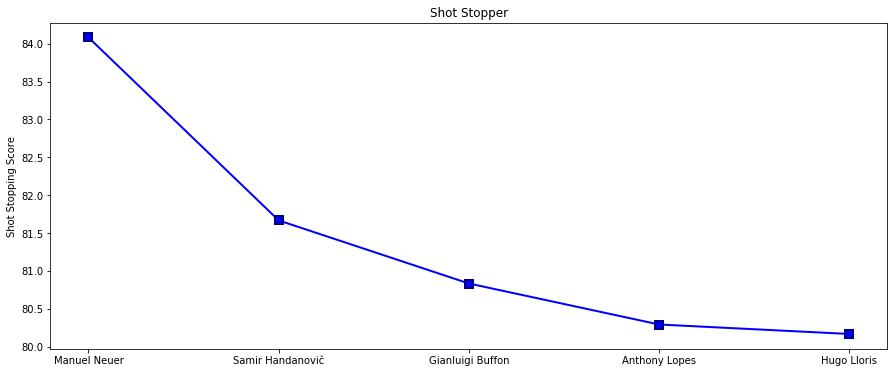

In [15]:
plt.figure(figsize=(15,6))
 
# Generate sequential data and plot
sd = df.sort_values('gk_Shot_Stopper', ascending=False)[:5]
x1 = np.array(list(sd['Name']))
y1 = np.array(list(sd['gk_Shot_Stopper']))
plt.plot(x1,y1,marker='s', c='b', ls='-', lw=2, ms=8, mew=2, mec='navy');
#sns.barplot(x1, y1, palette= "colorblind")
plt.ylabel("Shot Stopping Score")
plt.title("Shot Stopper");

Based on the shot-stopper characteristics, it can be inferred that Manuel Neuer is the best goalkeeper as you can see he tops the above list. Let us now plot the other parameter(Sweeper) as well.

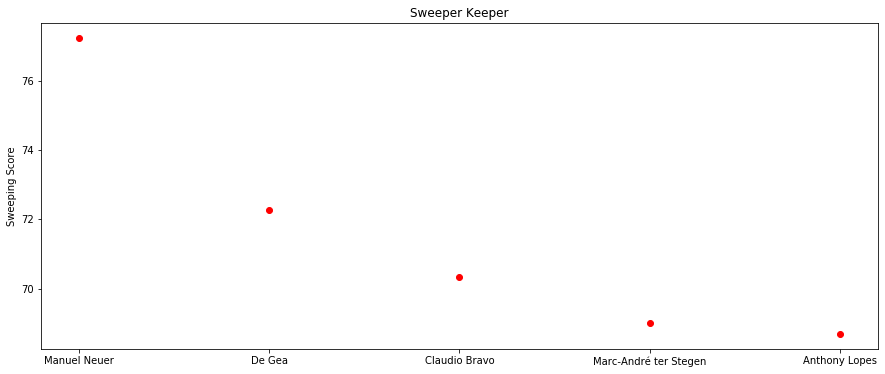

In [14]:
plt.figure(figsize=(15,6))
sd = df.sort_values('gk_Sweeper', ascending=False)[:5]
x2 = np.array(list(sd['Name']))
y2 = np.array(list(sd['gk_Sweeper']))
plt.plot(x2,y2,'or')
plt.ylabel("Sweeping Score")
plt.title("Sweeper Keeper");

Manuel Neuer tops the chart here as well. Based on the two parameters we used, we can conclude that Manuel Neuer would be the best choice goalkeeper for the World Cup 2018.

World’s Best Playing XI: Finding The Best Defenders
In order to find the best defenders, I’ll be using following attributes to fetch the best defenders:
Centre Backs: We need two center-backs. One who plays LCB and the other who plays RCB.
Wing Backs: We again need two wing backs. One who plays on the Left and the other who plays on the right.

In [17]:
#Choosing Defenders
df['df_centre_backs'] = ( d*df.Reactions + c*df.Interceptions + d*df.Sliding_Tackle + d*df.Standing_Tackle + b*df.Vision+ b*df.Composure + b*df.Crossing +a*df.Short_Pass + b*df.Long_Pass+ c*df.Acceleration + b*df.Speed
+ d*df.Stamina + d*df.Jumping + d*df.Heading + b*df.Long_Shots + d*df.Marking + c*df.Aggression)/(6*b + 3*c + 7*d)
df['df_wb_Wing_Backs'] = (b*df.Ball_Control + a*df.Dribbling + a*df.Marking + d*df.Sliding_Tackle + d*df.Standing_Tackle + a*df.Attacking_Position + c*df.Vision + c*df.Crossing + b*df.Short_Pass + c*df.Long_Pass + d*df.Acceleration +d*df.Speed + c*df.Stamina + a*df.Finishing)/(4*a + 2*b + 4*c + 4*d)


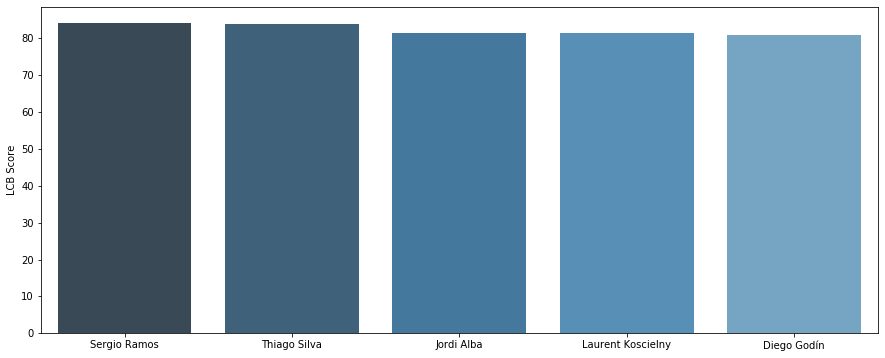

In [19]:
#for the left central defender
plt.figure(figsize=(15,6))
sd = df[(df['Club_Position'] == 'LCB')].sort_values('df_centre_backs', ascending=False)[:5]
x2 = np.array(list(sd['Name']))
y2 = np.array(list(sd['df_centre_backs']))
sns.barplot(x2, y2, palette=sns.color_palette("Blues_d"))
plt.ylabel("LCB Score");

Based on the left centre back characteristics, it can be inferred that Sergio Ramos is the Best Left Central Defender. 

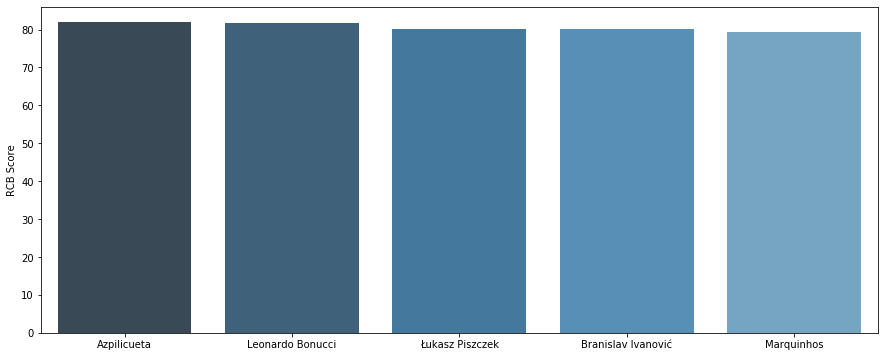

In [21]:
# right central defender
plt.figure(figsize=(15,6))
 
sd = df[(df['Club_Position'] == 'RCB')].sort_values('df_centre_backs', ascending=False)[:5]
x2 = np.array(list(sd['Name']))
y2 = np.array(list(sd['df_centre_backs']))
sns.barplot(x2, y2, palette=sns.color_palette("Blues_d"))
plt.ylabel("RCB Score");

Based on the right centre back characteristics, it can be inferred that Azpilicueta is the Best Right Central Defender. 

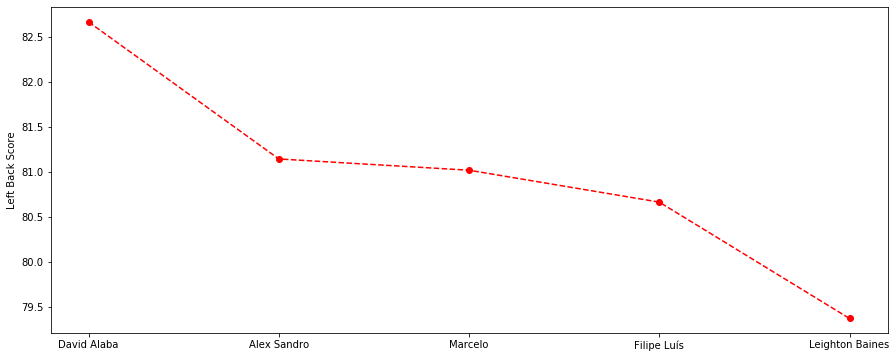

In [24]:
#for left wwing back
plt.figure(figsize=(15,6))
 
sd = df[(df['Club_Position'] == 'LWB') | (df['Club_Position'] == 'LB')].sort_values('df_wb_Wing_Backs', ascending=False)[:5]
x4 = np.array(list(sd['Name']))
y4 = np.array(list(sd['df_wb_Wing_Backs']))
plt.plot(x4,y4,'o--r')
plt.ylabel("Left Back Score");



Since David Alaba’s team does not qualify in the world cup 2018, I’ll be picking Alex Sandro as the best LWB/LB defender.

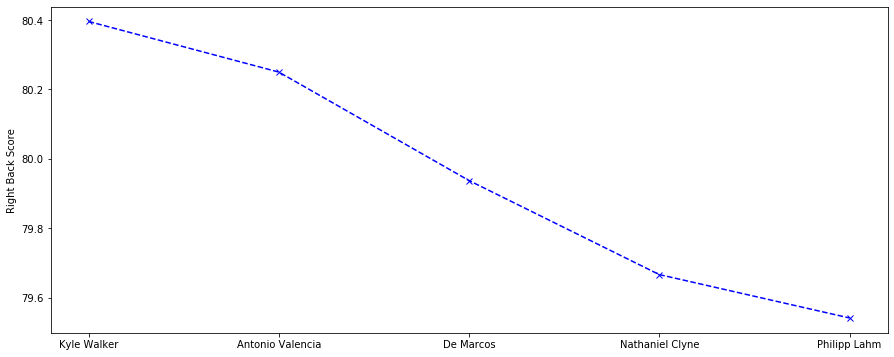

In [27]:
# for right wing back
plt.figure(figsize=(15,6))
sd = df[(df['Club_Position'] == 'RWB') | (df['Club_Position'] == 'RB')].sort_values('df_wb_Wing_Backs', ascending=False)[:5]
x5 = np.array(list(sd['Name']))
y5 = np.array(list(sd['df_wb_Wing_Backs']))
plt.plot(x5,y5,'x--b')
plt.ylabel("Right Back Score");

As per the above analysis, it is evident that Kyle Walker is the best RWB/RB for World Cup 2018.

Having said that, below is the list of the best defenders for this World Cup 2018:
Alex Sandro
Sergio Ramos
Cesar Azpi
Kyle Walker

# World’s Best Playing XI: Finding The Best Mid-Fielders

In [30]:
#Midfielding Indices
df['mf_playmaker'] = (d*df.Ball_Control + d*df.Dribbling + a*df.Marking + d*df.Reactions + d*df.Vision + c*df.Attacking_Position + c*df.Crossing + d*df.Short_Pass + c*df.Long_Pass + c*df.Curve + b*df.Long_Shots + c*df.Freekick_Accuracy)/(1*a + 1*b + 4*c + 4*d)
df['mf_beast'] = (d*df.Agility + c*df.Balance + b*df.Jumping + c*df.Strength + d*df.Stamina + a*df.Speed + c*df.Acceleration + d*df.Short_Pass + c*df.Aggression + d*df.Reactions + b*df.Marking + b*df.Standing_Tackle + b*df.Sliding_Tackle + b*df.Interceptions)/(1*a + 5*b + 4*c + 4*d)
df['mf_controller'] = (b*df.Weak_foot + d*df.Ball_Control + a*df.Dribbling + a*df.Marking + a*df.Reactions + c*df.Vision + c*df.Composure + d*df.Short_Pass + d*df.Long_Pass)/(2*c + 3*d + 4*a)
#Let us plot each one of them.

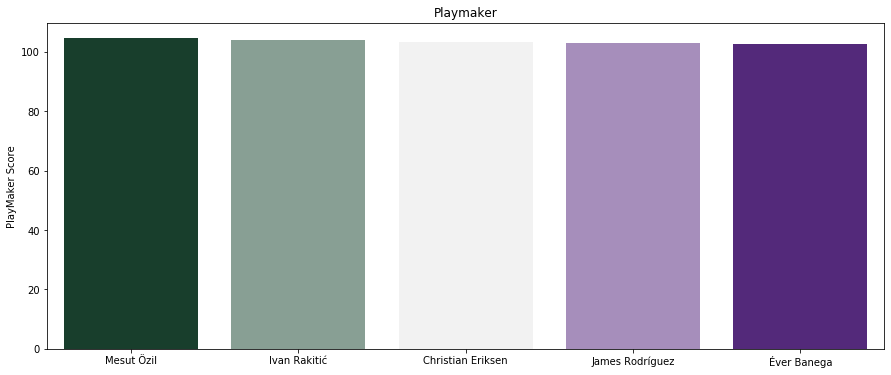

In [34]:
plt.figure(figsize=(15,6))
 
ss = df[(df['Club_Position'] == 'CAM') | (df['Club_Position'] == 'LAM') | (df['Club_Position'] == 'RAM')].sort_values('mf_playmaker', ascending=False)[:5]
x3 = np.array(list(ss['Name']))
y3 = np.array(list(ss['mf_playmaker']))
sns.barplot(x3, y3, palette=sns.diverging_palette(145, 280, s=85, l=25, n=5))
plt.ylabel("PlayMaker Score")
plt.title("Playmaker");


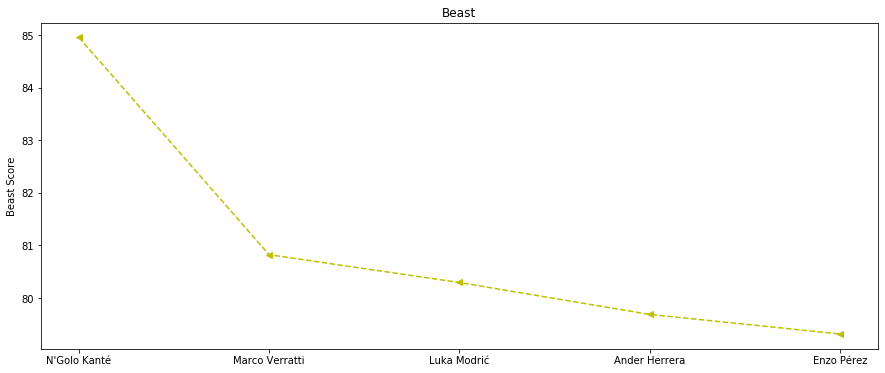

In [36]:
plt.figure(figsize=(15,6))
 
ss = df[(df['Club_Position'] == 'RCM') | (df['Club_Position'] == 'RM')].sort_values('mf_beast', ascending=False)[:5]
x2 = np.array(list(ss['Name']))
y2 = np.array(list(ss['mf_beast']))
plt.plot(x2,y2,'<--y')
plt.ylabel("Beast Score")
plt.title("Beast");


Text(0.5, 1.0, 'Controller')

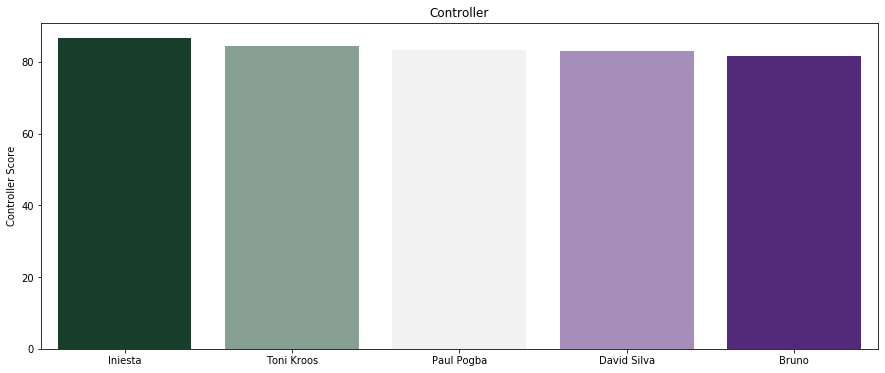

In [37]:
plt.figure(figsize=(15,6))
 
# Generate some sequential data
ss = df[(df['Club_Position'] == 'LCM') | (df['Club_Position'] == 'LM')].sort_values('mf_controller', ascending=False)[:5]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['mf_controller']))
sns.barplot(x1, y1, palette=sns.diverging_palette(145, 280, s=85, l=25, n=5))
plt.ylabel("Controller Score")
plt.title("Controller");

Having said that, below is the list of the best mid-fielders for this World Cup 2018:
Andres Iniesta
Mesut Ozil
N'Golo Kante

# World’s Best Playing XI: Finding The Best Attackers

In order to find the best attacker, I’ll be analyzing the below mentioned parameters:
Attacking Left Wing: He is a player, attacking from the left flank.
Attacking Right Wing: He is a player, attacking from the right flank.
Striker: He is a player attacking from the center.

In [38]:
#Attackers
df['att_left_wing'] = (c*df.Weak_foot + c*df.Ball_Control + c*df.Dribbling + c*df.Speed + d*df.Acceleration + b*df.Vision + c*df.Crossing + b*df.Short_Pass + b*df.Long_Pass + b*df.Aggression + b*df.Agility + a*df.Curve + c*df.Long_Shots + b*df.Freekick_Accuracy + d*df.Finishing)/(a + 6*b + 6*c + 2*d)
df['att_right_wing'] = (c*df.Weak_foot + c*df.Ball_Control + c*df.Dribbling + c*df.Speed + d*df.Acceleration + b*df.Vision + c*df.Crossing + b*df.Short_Pass + b*df.Long_Pass + b*df.Aggression + b*df.Agility + a*df.Curve + c*df.Long_Shots + b*df.Freekick_Accuracy + d*df.Finishing)/(a + 6*b + 6*c + 2*d)
df['att_striker'] = (b*df.Weak_foot + b*df.Ball_Control + a*df.Vision + b*df.Aggression + b*df.Agility + a*df.Curve + a*df.Long_Shots + d*df.Balance + d*df.Finishing + d*df.Heading + c*df.Jumping + c*df.Dribbling)/(3*a + 4*b + 2*c + 3*d)


Text(0, 0.5, 'Left Wing')

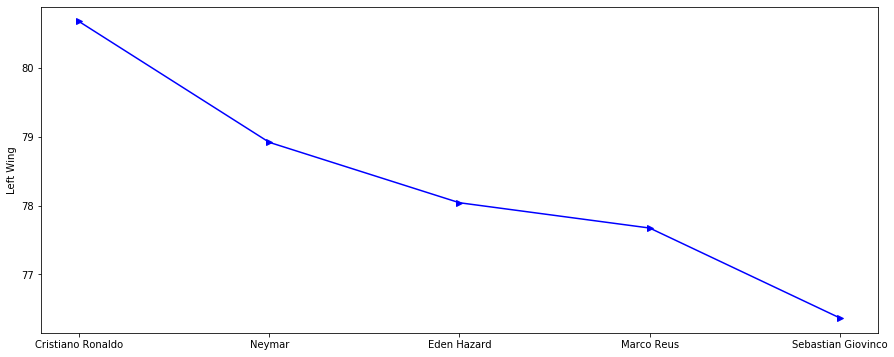

In [39]:
plt.figure(figsize=(15,6))
 
ss = df[(df['Club_Position'] == 'LW') | (df['Club_Position'] == 'LM') | (df['Club_Position'] == 'LS')].sort_values('att_left_wing', ascending=False)[:5]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['att_left_wing']))
plt.plot(x1,y1,'>-b')
plt.ylabel("Left Wing")

Text(0, 0.5, 'Right Wing')

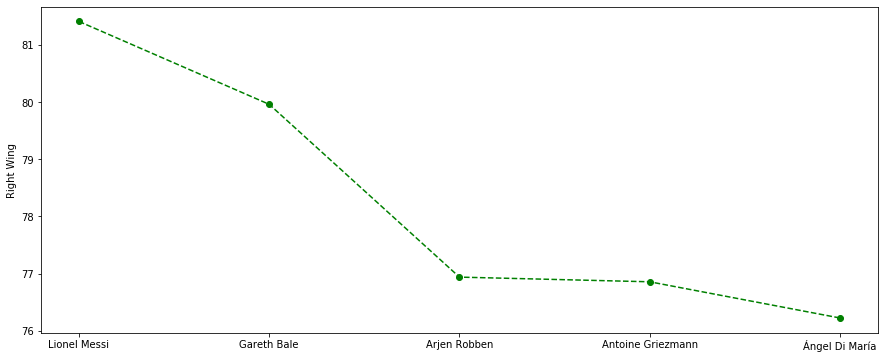

In [40]:
plt.figure(figsize=(15,6))
 
ss = df[(df['Club_Position'] == 'RW') | (df['Club_Position'] == 'RM') | (df['Club_Position'] == 'RS')].sort_values('att_right_wing', ascending=False)[:5]
x2 = np.array(list(ss['Name']))
y2 = np.array(list(ss['att_right_wing']))
plt.plot(x2,y2,'o--g')
plt.ylabel("Right Wing")

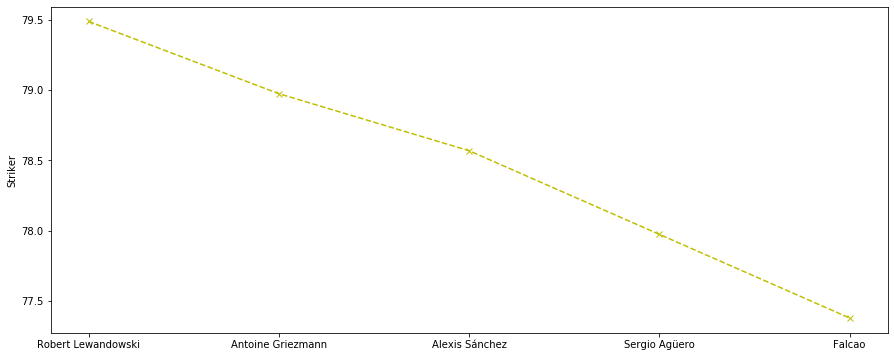

In [42]:
plt.figure(figsize=(15,6))
ss = df[(df['Club_Position'] == 'ST') | (df['Club_Position'] == 'LS') | (df['Club_Position'] == 'RS') | (df['Club_Position'] == 'CF')].sort_values('att_striker', ascending=False)[:5]
x3 = np.array(list(ss['Name']))
y3 = np.array(list(ss['att_striker']))
plt.plot(x3,y3,'x--y')
plt.ylabel("Striker");

Having said that, below is the list of the best attackers in the world:
Cristiano Ronaldo
Robert Lewandowski
Lionel Messi

In [43]:
from urllib.request import urlretrieve

In [44]:
urlretrieve('https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2018/06/World-Best-Playing-XI-in-2018-Edureka.png', 'chart.jpg');

In [45]:
from PIL import Image

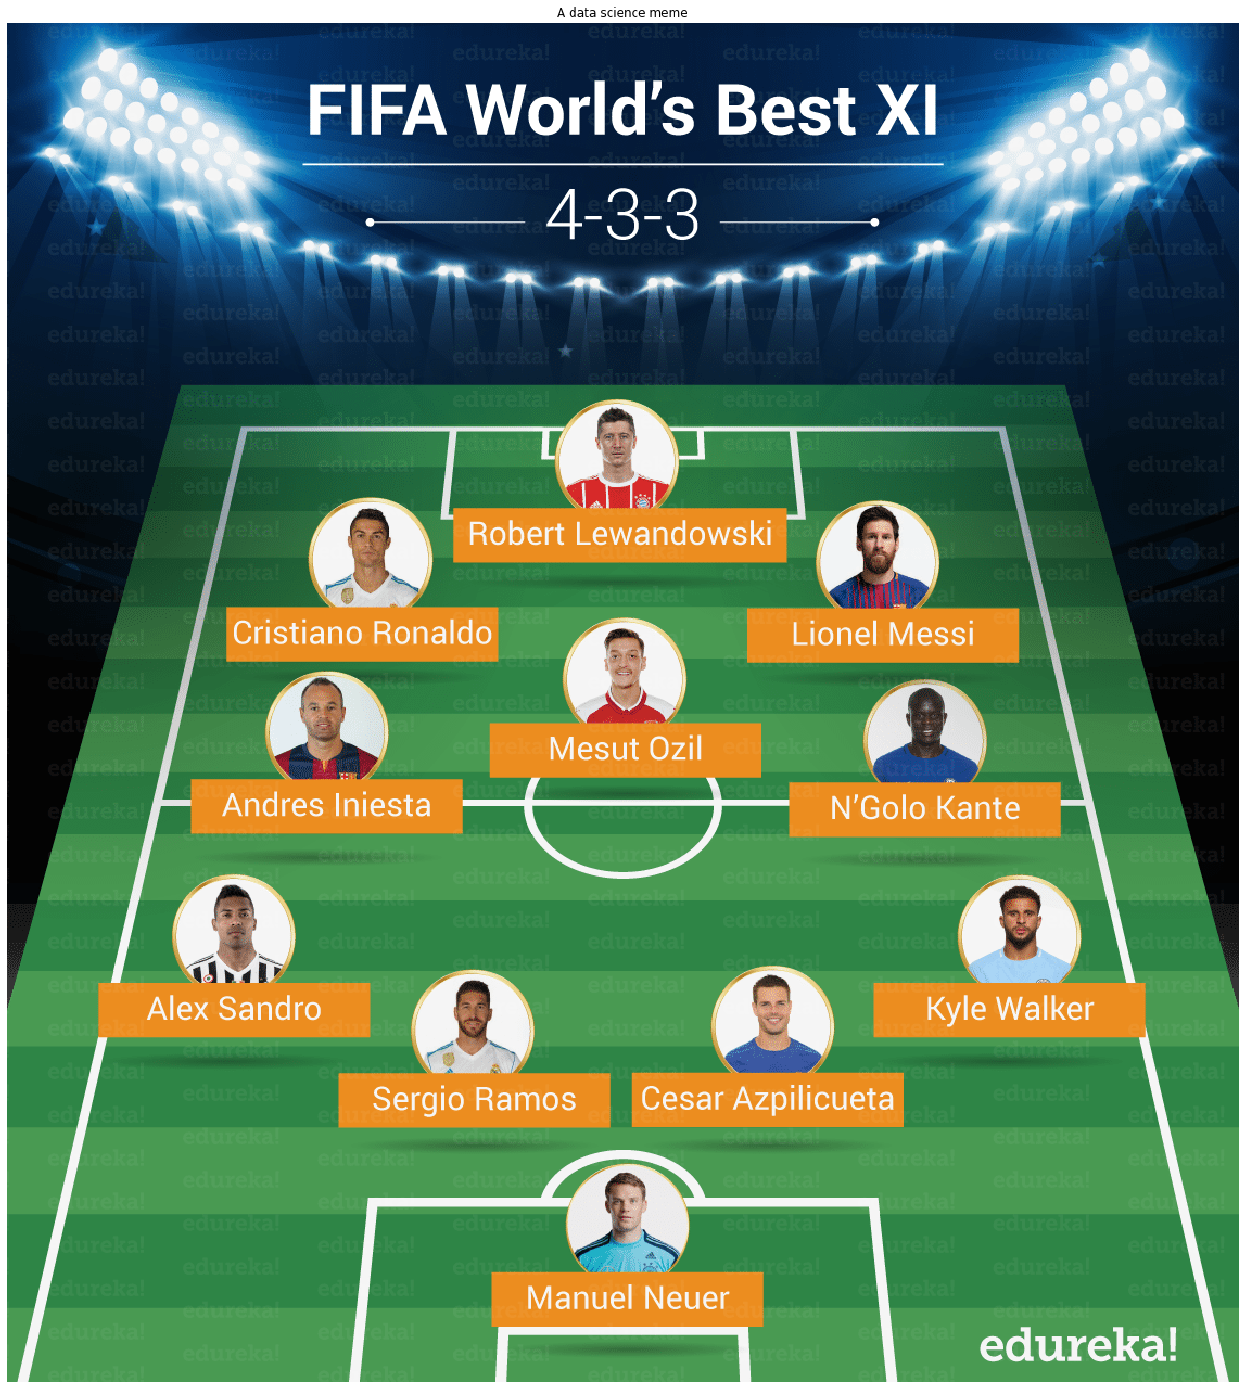

In [50]:
plt.figure(figsize=(30,25))
plt.grid(False)
plt.title('A data science meme')
plt.axis('off')
plt.imshow(img);

To conclude our analysis, the above image represents the World’s Best Playing XI for the World Cup 2018 in the 4-3-3 lineup.
 

# Step 4: Ask & answer questions about the data

Q1: Describe the types of defenders.


ans:Centre Backs: We need two center-backs. One who plays LCB and the other who plays RCB.
Wing Backs: We again need two wing backs. One who plays on the Left and the other who plays on the right.

Q2.Which is the best rb?

Ans: Cesar Azpilicueta

Q3: Which is the best rw?

Ans: Lionel Messi

Q3:Which is the best Mid feilder?

Ans:Andres Iniesta

# Step 5: Summarize your inferences & write a conclusion

Pandas provides tools for working with tabular data, i.e. data that is organized into tables that have rows and columns. Tabular data has a lot of the same functionality as SQL or Excel, but Pandas adds the power of Python.

references:https://www.edureka.co/blog/football-world-cup-best-xi-analysis-using-python/

# Step 6: Make a submission & share your work


In [53]:
!pip install jovian --upgrade --quiet


In [54]:
import jovian

<IPython.core.display.Javascript object>

In [55]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ········
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/manavparmar1609/untitled


'https://jovian.ai/manavparmar1609/untitled'